In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns

from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

from collections import Counter

sns.set(rc={'figure.figsize': (11.7, 8.27)})
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

data_startcol = 7
ogDatasObj = {}
for col in xlsx:
    if col >= data_startcol: # startcol 7
        ogDatasObj[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]

ogDatas = pd.DataFrame(ogDatasObj)
ogDatas = ogDatas.fillna(0)
ogDatas = ogDatas.reset_index()
del ogDatas['index']

pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 100)

ogDatas

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,아파트1-103-502,아파트1-103-1602,아파트1-103-301,아파트1-103-1502,아파트1-103-202,아파트1-102-903,아파트1-102-603,아파트1-102-203,아파트1-102-704,아파트1-102-703,아파트1-102-403,아파트1-102-303,아파트1-101-604,아파트1-101-1602,아파트1-101-1002,아파트1-101-1202,아파트1-101-1604,아파트1-101-402,아파트1-101-303,아파트1-101-502,아파트1-101-1403,아파트1-101-904,아파트1-101-1502,아파트1-101-1102,아파트1-101-901,아파트1-101-704,아파트1-101-504,아파트1-102-104,아파트1-102-301,아파트1-102-1501,아파트1-102-1602,아파트1-102-1002,아파트1-102-401,아파트1-102-802,아파트1-102-801,아파트1-103-505,아파트1-103-1805,아파트1-103-1306,아파트1-103-1806,아파트1-103-803,...,아파트4-103-609,아파트4-103-707,아파트4-103-101,아파트4-102-803,아파트4-101-1501,아파트4-103-404,아파트4-103-909,아파트4-101-1203,아파트4-103-806,아파트4-103-1410,아파트4-103-402,아파트4-103-703,아파트4-103-106,아파트4-103-910,아파트4-102-402,아파트4-103-907,아파트4-103-1406,아파트4-103-1006,아파트4-103-608,아파트4-103-403,아파트4-105-1102,아파트4-103-804,아파트4-103-103,아파트4-103-706,아파트4-104-1001,아파트4-105-103,아파트4-102-401,아파트4-103-1104,아파트4-103-906,아파트4-103-606,아파트4-103-1307,아파트4-103-410,아파트4-103-1309,아파트4-102-102,아파트4-103-508,아파트4-105-1104,아파트4-102-1402,아파트4-103-407,아파트4-103-1206,아파트4-103-108,아파트4-105-102,아파트4-103-1102,아파트4-105-601,아파트4-104-1501,아파트4-103-702,아파트4-102-104,아파트4-103-902,아파트4-101-602,아파트4-103-905,아파트4-101-104
0,0.085,0.016,0.052,0.003,0.032,0.074,0.053,0.096,0.105,0.042,0.149,0.039,0.054,0.132,0.091,0.169,0.051,0.118,0.060,0.047,0.047,0.053,0.046,0.104,0.079,0.092,0.043,0.069,0.139,0.026,0.146,0.092,0.025,0.127,0.045,0.042,0.113,0.207,0.030,0.171,0.045,0.064,0.045,0.277,0.186,0.142,0.132,0.034,0.088,0.041,...,0.041,0.137,0.114,0.046,0.098,0.058,0.068,0.040,0.063,0.048,0.168,0.053,0.099,0.075,0.080,0.158,0.024,0.153,0.056,0.037,0.091,0.069,0.128,0.092,0.072,0.069,0.034,0.166,0.086,0.113,0.184,0.175,0.096,0.054,0.080,0.084,0.119,0.088,0.117,0.161,0.182,0.044,0.051,0.057,0.126,0.094,0.065,0.116,0.093,0.147
1,0.086,0.049,0.053,0.002,0.022,0.014,0.048,0.090,0.108,0.022,0.119,0.023,0.075,0.142,0.063,0.183,0.045,0.164,0.065,0.066,0.043,0.056,0.045,0.130,0.081,0.102,0.042,0.083,0.176,0.046,0.113,0.088,0.026,0.116,0.066,0.050,0.139,0.188,0.031,0.165,0.032,0.068,0.052,0.244,0.209,0.205,0.161,0.039,0.094,0.036,...,0.036,0.083,0.124,0.055,0.115,0.068,0.072,0.032,0.085,0.111,0.173,0.050,0.103,0.068,0.076,0.360,0.031,0.132,0.038,0.037,0.097,0.075,0.123,0.072,0.053,0.059,0.023,0.135,0.143,0.112,0.101,0.163,0.154,0.078,0.036,0.076,0.092,0.042,0.121,0.179,0.117,0.060,0.036,0.055,0.116,0.089,0.083,0.113,0.105,0.130
2,0.085,0.013,0.073,0.002,0.016,0.051,0.029,0.033,0.097,0.046,0.116,0.018,0.071,0.096,0.159,0.122,0.043,0.141,0.097,0.064,0.055,0.054,0.051,0.119,0.109,0.097,0.056,0.086,0.126,0.036,0.113,0.079,0.027,0.170,0.072,0.044,0.163,0.201,0.053,0.163,0.041,0.071,0.046,0.256,0.173,0.199,0.122,0.028,0.084,0.026,...,0.045,0.081,0.115,0.063,0.070,0.053,0.078,0.036,0.083,0.111,0.084,0.053,0.084,0.071,0.087,0.471,0.024,0.079,0.047,0.036,0.078,0.059,0.137,0.084,0.083,0.056,0.036,0.106,0.160,0.108,0.184,0.162,0.124,0.135,0.053,0.073,0.108,0.056,0.100,0.224,0.147,0.053,0.075,0.032,0.131,0.055,0.084,0.153,0.119,0.104
3,0.085,0.043,0.067,0.002,0.015,0.015,0.031,0.092,0.048,0.067,0.102,0.031,0.128,0.082,0.104,0.141,0.031,0.103,0.075,0.082,0.046,0.016,0.046,0.078,0.070,0.073,0.051,0.085,0.098,0.048,0.145,0.078,0.021,0.142,0.062,0.034,0.149,0.194,0.038,0.065,0.043,0.070,0.043,0.274,0.047,0.108,0.162,0.034,0.069,0.038,...,0.039,0.086,0.068,0.035,0.064,0.061,0.065,0.022,0.066,0.087,0.080,0.047,0.079,0.066,0.029,0.187,0.030,0.059,0.055,0.035,0.080,0.074,0.090,0.066,0.071,0.062,0.034,0.114,0.121,0.108,0.051,0.170,0.068,0.072,0.074,0.078,0.101,0.080,0.084,0.178,0.152,0.047,0.064,0.022,0.104,0.057,0.087,0.149,0.102,0.093
4,0.084,0.033,0.051,0.003,0.022,0.052,0.052,0.030,0.041,0.045,0.102,0.032,0.122,0.069,0.089,0.103,0.011,0.094,0.084,0.053,0.047,0.022,0.048,0.040,0.077,0.089,0.041,0.092,0.062,0.045,0.109,0.109,0.033,0.084,0.069,0.035,0.225,0.199,0.078,

In [3]:
startDate = datetime(2018,5,1)
endDate = datetime(2019,5,1)
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
dateIndexArr = [dt.strftime('%Y%m%d') for dt in
                   datetime_range(startDate, endDate, timedelta(days = 1))]

searchKeyword = '아파트1-104-1206'
tsDatasObj = {}
startIdx = 0;
endIdx = 96;
for date in dateIndexArr:
    tsDatasObj[date] = ogDatas[searchKeyword][startIdx:endIdx].values.tolist()
    startIdx = endIdx
    endIdx = endIdx + 96

tsDatas = pd.DataFrame(tsDatasObj)
tsDatas = tsDatas.T
tsDatas = tsDatas.reset_index()
tsDatas.rename(columns={'index':'date'}, inplace=True)
tsDatas['year'] = [dt[0:4] for dt in tsDatas['date']]
tsDatas['month'] = [dt[4:6] for dt in tsDatas['date']]
tsDatas['day'] = [dt[6:8] for dt in tsDatas['date']]
tsDatas['date'] = [datetime.strptime(dt, "%Y%m%d") for dt in tsDatas['date']]
tsDatas.reindex(columns=['date', 'year', 'month', 'day'])

,date,year,month,day
0,2018-05-01,2018,05,01
1,2018-05-02,2018,05,02
2,2018-05-03,2018,05,03
3,2018-05-04,2018,05,04
4,2018-05-05,2018,05,05
...,...,...,...,...
360,2019-04-26,2019,04,26
361,2019-04-27,2019,04,27
362,2019-04-28,2019,04,28
363,2019-04-29,2019,04,29


In [4]:
DAYS = {
    "월" : 0,
    "화" : 1,
    "수" : 2,
    "목" : 3,
    "금" : 4,
    "토" : 5,
    "일" : 6
}

SEASONS = {
    "봄" : ["03", "04", "05"],
    "여름" : ["06", "07", "08"],
    "가을" : ["09", "10", "11"],
    "겨울" : ["12", "01", "02"]
}

ALLDATAS = False
DAY = "월"
SEASON = "여름"
# ALLDATAS is tsDatas
if ALLDATAS:
    datas = tsDatas
else :    
    datas = tsDatas[(tsDatas['month'].isin(SEASONS[SEASON]))
            & (tsDatas['date'].dt.weekday == DAYS[DAY]) ]
datas

,date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,year,month,day
34,2018-06-04,0.064,0.057,0.058,0.056,0.052,0.051,0.051,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.050,0.050,0.050,0.050,0.051,0.050,0.054,0.056,0.055,0.040,0.055,0.057,0.103,0.056,0.053,0.052,0.052,0.052,0.051,0.052,0.051,0.051,0.050,0.051,0.051,0.051,0.051,0.051,0.051,0.052,0.051,0.052,0.051,0.051,0.051,0.050,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.051,0.051,0.050,0.052,0.050,0.051,0.050,0.051,0.050,0.051,0.054,0.057,0.056,0.073,0.097,0.085,0.083,0.083,0.082,0.102,0.105,0.102,0.105,0.105,0.108,0.109,0.108,0.108,0.083,0.078,0.077,0.059,2018,06,04
41,2018-06-11,0.097,0.097,0.097,0.097,0.097,0.097,0.097,0.097,0.097,0.100,0.098,0.062,0.061,0.061,0.060,0.061,0.060,0.060,0.059,0.064,0.066,0.065,0.048,0.064,0.062,0.062,0.060,0.062,0.061,0.061,0.065,0.079,0.050,0.051,0.051,0.050,0.051,0.051,0.051,0.052,0.050,0.051,0.050,0.050,0.050,0.051,0.051,0.051,0.050,0.049,0.050,0.050,0.050,0.051,0.050,0.050,0.051,0.050,0.051,0.051,0.050,0.051,0.051,0.045,0.031,0.051,0.051,0.051,0.051,0.030,0.047,0.051,0.054,0.056,0.057,0.043,0.053,0.054,0.053,0.053,0.052,0.052,0.052,0.052,0.069,0.090,0.086,0.081,0.081,0.082,0.085,0.086,0.079,0.058,0.060,0.059,2018,06,11
48,2018-06-18,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.060,0.055,0.054,0.055,0.054,0.054,0.054,0.054,0.054,0.054,0.053,0.054,0.054,0.053,0.054,0.054,0.053,0.053,0.054,0.053,0.053,0.053,0.054,0.053,0.054,0.053,0.054,0.053,0.053,0.054,0.053,0.053,0.054,0.054,0.053,0.053,0.054,0.053,0.054,0.053,0.053,0.054,0.052,0.055,0.058,0.082,0.087,0.091,0.095,0.102,0.095,0.094,0.093,0.090,0.089,0.090,0.089,0.072,0.059,0.058,0.059,2018,06,18
55,2018-06-25,0.068,0.059,0.058,0.059,0.058,0.058,0.059,0.058,0.058,0.057,0.056,0.057,0.056,0.057,0.057,0.056,0.057,0.060,0.062,0.062,0.046,0.061,0.059,0.059,0.058,0.057,0.058,0.057,0.057,0.057,0.058,0.090,0.052,0.050,0.051,0.050,0.050,0.051,0.051,0.050,0.051,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.049,0.050,0.050,0.050,0.050,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.050,0.051,0.051,0.054,0.057,0.057,0.041,0.055,0.053,0.051,0.052,0.052,0.051,0.052,0.051,0.050,0.050,0.051,0.050,0.051,0.054,0.229,0.359,0.369,0.300,0.139,0.089,0.087,0.080,0.317,0.321,2018,06,25
62,2018-07-02,0.050,0.050,0.048,0.030,0.049,0.050,0.051,0.050,0.050,0.050,0.053,0.056,0.127,0.300,0.189,0.181,0.160,0.128,0.059,0.059,0.057,0.058,0.057,0.056,0.057,0.056,0.056,0.056,0.057,0.057,0.057,0.067,0.105,0.052,0.053,0.053,0.053,0.053,0.053,0.054,0.053,0.053,0.053,0.053,0.053,0.036,0.047,0.054,0.054,0.054,0.055,0.054,0.053,0.054,0.053,0.053,0.053,0.053,0.053,0.047,0.032,0.054,0.053,0.053,0.059,0.058,0.059,0.043,0.058,0.056,0.055,0.055,0.055,0.055,0.054,0.054,0.054,0.054,0.053,0.054,0.089,0.343,0.361,0.127,0.094,0.096,0.078,0.061,0.062,0.061,0.061,0.061,0.061,0.060,0.060,0.060,2018,07,02
69,2018-07-09,0.216,0.192,0.181,0.164,0.181,0.183,0.162,0.174,0.183,0.156,0.057,0.058,0.057,0.056,0.056,0.057,0.056,0.056,0.056,0.056,0.056,0.056,0.057,0.055,0.056,0.055,0.056,0.057,0.057,0.056,0.057,0.059,0.086,0.050,0.049,0.050,0.050,0.049,0.051,0.049,0.050,0.050,0.049,0.050,0.050,0.050,0.050,0.050,0.051,0.050,0.050,0.050,0.050,0.050,0.053,0.057,0.057,0.040,0.055,0.053,0.052,0.051,0.052,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.050,0.051,0.050,0.051,0.050,0.050,0.070,0.114,0.080,0.080,0.080,0.080,0.081,0.082,0.081,0.081,0.082,0.081,0.081,0.082,0.082,0.081,0.081,0.081,0.081,0.080,2018,07,09
76,2018-07-16,0.055,0.055,0.055,0.055,0.054,0.055,0.055,0.054,0.054,0.054,0.055,0.054,0.054,0.0

In [5]:
dpp = datas[datas.columns.difference(['date', 'year', 'month', 'day'])].copy()
dpp = dpp

# Scaler 선택
# STD, MIN, MAX, ROBUST
selScaler = "ROBUST"

scaler = StandardScaler()
if selScaler == "STD":
    scaler = StandardScaler()
elif selScaler == "MIN":
    scaler = MinMaxScaler()
elif selScaler == "MAX":
    scaler = MaxAbsScaler()
elif selScaler == "ROBUST":
    scaler = RobustScaler()

dpp = pd.DataFrame(scaler.fit_transform(dpp))

dpp.index = datas['date']
dpp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-04,-0.200000,-0.631579,-0.178862,-0.245283,-0.201439,-0.252101,-0.281553,-0.271028,-0.079365,-0.058824,-0.162791,-1.75,-1.6,-1.2,-0.163265,-1.75,-2.00,-2.666667,-2.25,-1.166667,-1.4,-1.4,-3.5,-0.8,-0.333333,-0.4,-4.50,-0.027523,-0.008696,0.43,-0.014085,-0.260563,-0.102564,-0.222222,0.000000,-0.250,0.00,0.000000,-0.50,-0.50,-0.666667,0.00,-0.25,-0.50,-0.666667,-0.5,0.00,-0.666667,-0.333333,-0.50,-0.333333,-0.333333,-0.666667,-0.5,-0.5,-0.5,-0.5,0.000000,-0.5,0.0,0.0,-0.333333,-0.5,0.000000,0.0,0.000000,-0.333333,0.5,-0.25,-0.333333,-0.666667,0.0,-1.000000,-0.333333,0.666667,4.0,1.0,6.666667,1.571429,0.939394,0.233333,0.206897,0.233333,0.833333,1.178571,0.512195,1.277778,1.20,1.35,1.217391,1.125000,1.20,0.272727,0.000000,0.000000,-0.782609
2018-06-11,0.188235,0.421053,0.138211,0.141509,0.122302,0.134454,0.165049,0.158879,0.293651,0.421569,0.953488,1.00,0.6,0.8,0.040816,0.75,0.50,0.666667,0.00,1.166667,1.8,1.4,-4.5,1.2,1.666667,1.0,0.50,0.036697,0.026087,0.01,0.028169,-0.077465,-0.128205,-0.333333,-0.166667,-0.375,-0.25,0.000000,-0.50,0.00,-1.000000,0.00,-0.50,-0.75,-1.000000,-0.5,-0.25,-0.666667,-1.000000,-1.00,-0.666667,-0.666667,-0.666667,-0.5,-1.0,-1.0,-0.5,-0.333333,-0.5,0.0,-0.5,-0.333333,0.0,-2.000000,-10.0,0.000000,0.000000,0.0,0.00,-7.333333,-1.666667,0.0,0.333333,1.333333,1.666667,-10.0,-0.5,0.333333,0.000000,-0.030303,-0.800000,-0.862069,-0.766667,-0.833333,-0.107143,0.219512,0.222222,0.00,0.00,0.043478,0.166667,0.32,-0.090909,-0.909091,-0.809524,-0.782609
2018-06-18,-0.247059,-0.552632,-0.162602,-0.207547,-0.143885,-0.176471,-0.194175,-0.186916,0.000000,0.029412,0.069767,0.50,0.4,0.6,0.040816,0.50,0.50,0.666667,0.25,0.500000,0.6,0.4,1.5,0.4,1.000000,0.6,0.50,0.018349,0.017391,0.00,0.004695,-0.211268,0.000000,0.666667,1.333333,0.875,0.75,1.000000,0.50,0.50,0.333333,0.75,0.50,0.25,0.333333,0.5,0.50,0.333333,0.000000,0.25,0.666667,0.333333,0.333333,1.0,0.5,0.5,0.5,1.000000,0.5,1.5,1.0,0.666667,1.0,0.666667,1.5,0.666667,0.666667,1.5,0.75,0.333333,0.333333,1.5,0.000000,0.666667,0.333333,0.0,0.0,-0.333333,0.071429,0.121212,0.200000,0.344828,0.533333,0.600000,1.071429,0.341463,0.666667,0.60,0.45,0.347826,0.375000,0.44,-0.727273,-0.863636,-0.904762,-0.782609
2018-06-25,-0.152941,-0.578947,-0.178862,-0.216981,-0.158273,-0.193277,-0.203883,-0.205607,-0.015873,0.000000,-0.023256,-0.25,-0.4,0.0,-0.020408,-0.50,-0.25,0.666667,0.75,0.833333,-2.2,0.6,1.0,0.2,0.333333,0.0,0.00,-0.009174,-0.008696,-0.03,-0.004695,0.000000,-0.102564,-0.444444,-0.166667,-0.375,-0.50,0.000000,-0.50,-0.50,-0.666667,-0.25,-0.50,-0.75,-1.000000,-1.0,-0.50,-1.000000,-1.000000,-0.75,-1.000000,-0.666667,-0.666667,-1.0,-1.0,-1.0,-0.5,-0.333333,-0.5,-0.5,0.0,-0.666667,0.0,-0.333333,0.0,-0.333333,0.000000,0.0,0.75,1.666667,1.666667,-5.0,0.666667,0.333333,-0.333333,-1.0,-1.0,-0.666667,-0.035714,-0.090909,-0.866667,-0.931034,-0.800000,-0.900000,-0.750000,-0.658537,8.166667,13.90,14.40,9.521739,2.416667,0.44,0.636364,0.090909,11.428571,10.608696
2018-07-02,-0.364706,-0.815789,-0.260163,-0.490566,-0.223022,-0.260504,-0.281553,-0.280374,-0.079365,-0.068627,-0.093023,-0.50,13.8,48.6,2.673469,30.75,25.50,23.333333,0.00,0.333333,0.0,0.0,0.0,-0.4,0.000000,-0.2,-0.50,-0.018349,-0.008696,-0.03,-0.009390,-0.161972,0.576923,-0.222222,0.166667,0.000,0.25,0.666667,0.00,0.50,0.000000,0.50,0.25,0.00,0.000000,-8.0,-1.25,0.333333,0.333333,0.25,1.000000,0.666667,0.333333,1.0,0.5,0.5,0.5,0.666667,0.5,-2.0,-9.5,0.666667,1.0,0.666667,4.0,2.333333,2.666667,-4.0,1.75,1.333333,1.000000,2.0,0.666667,1.000000,0.666667,1.0,0.0,0.333333,0.000000,0.000000,0.433333,9.172414,9.533333,1.666667,0.785714,0.365854,-0.2

In [6]:
pca = PCA(n_components=2)

pca.fit(dpp)
dr = pd.DataFrame(pca.transform(dpp), columns = ['x','y'])

dr.index = datas['date']
dr

,x,y
date,,
2018-06-04,-17.205005,-39.481559
2018-06-11,-13.973749,-32.917233
2018-06-18,-12.031088,-30.238112
2018-06-25,-12.117043,-35.429985
2018-07-02,-27.754690,-5.542892
2018-07-09,-14.499772,-39.202300
2018-07-16,-3.907852,2.717680
2018-07-23,-75.627042,97.895851
2018-07-30,196.289372,53.084507


<AxesSubplot:xlabel='x', ylabel='y'>

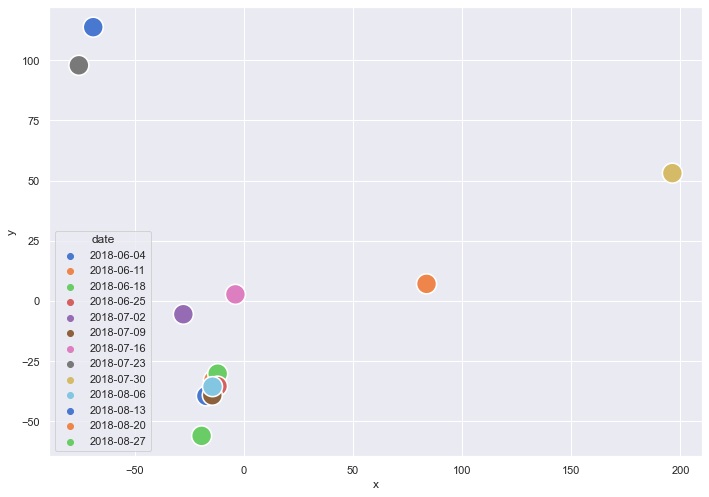

In [51]:
scatterDatas = dr.copy()
scatterDatas.reset_index(inplace=True)


date = [d.strftime('%Y-%m-%d') for d in scatterDatas['date']]
scatterDatas['date'] = date

sns.scatterplot(x='x', y="y", 
                palette="muted",
                hue="date",
                s=400,
                data=scatterDatas)

<AxesSubplot:xlabel='x', ylabel='y'>

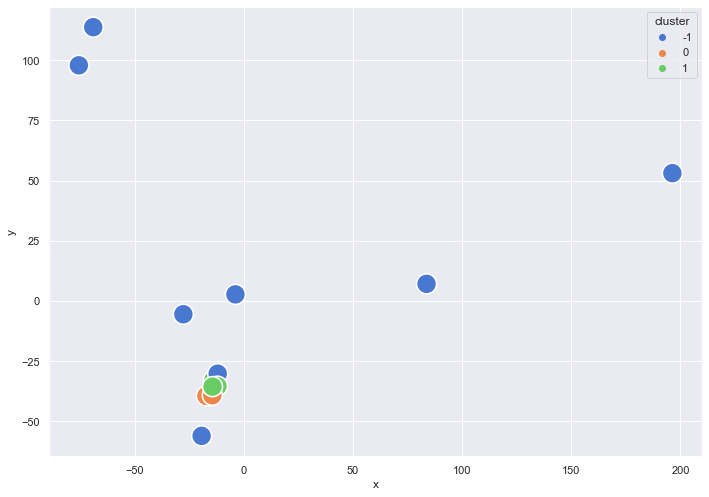

In [46]:
clustering = dr.copy()

result = DBSCAN(eps=3, min_samples=2).fit(dr)
clustering['cluster'] = result.labels_

sns.scatterplot(x='x', y="y", 
                hue="cluster",
                palette="muted",
                s=400,
                data=clustering)

<AxesSubplot:>

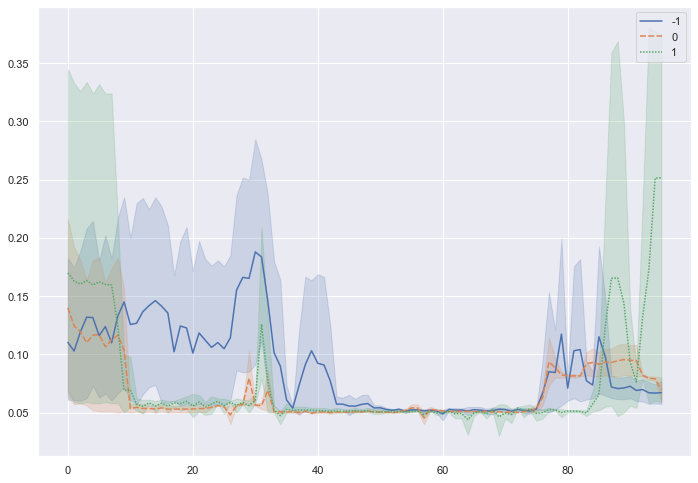

In [30]:
tsCheck = datas[datas.columns.difference(['year', 'month', 'day'])]
tsCheck.reset_index(inplace=True)
del tsCheck['index']
tsCheck = tsCheck.set_index('date')
tsCheck['cluster'] = clustering['cluster']
tsCheck.reset_index(inplace=True)
tsCheck.set_index(['cluster', 'date'], inplace=True)
tsCheck = tsCheck.T
tsCheck
sns.lineplot(data=tsCheck)

In [31]:
'''
Data Structure
{
    date: datetime,
    timeslot: integer,
    cluster: string,
    data: float
}
'''
processingData = [];
for d in tsCheck:
    for idx,t in enumerate(tsCheck[d]):
        processingData.append({
            "date": d[1],
            "timeslot": idx,
            "cluster": f"cluster-{d[0]}",
            "data": t
        })
processingData = pd.DataFrame(processingData)
processingData

,date,timeslot,cluster,data
0,2018-06-04,0,cluster-0,0.064
1,2018-06-04,1,cluster-0,0.057
2,2018-06-04,2,cluster-0,0.058
3,2018-06-04,3,cluster-0,0.056
4,2018-06-04,4,cluster-0,0.052
...,...,...,...,...
1243,2018-08-27,91,cluster--1,0.071
1244,2018-08-27,92,cluster--1,0.081
1245,2018-08-27,93,cluster--1,0.079
1246,2018-08-27,94,cluster--1,0.073


<AxesSubplot:xlabel='timeslot', ylabel='data'>

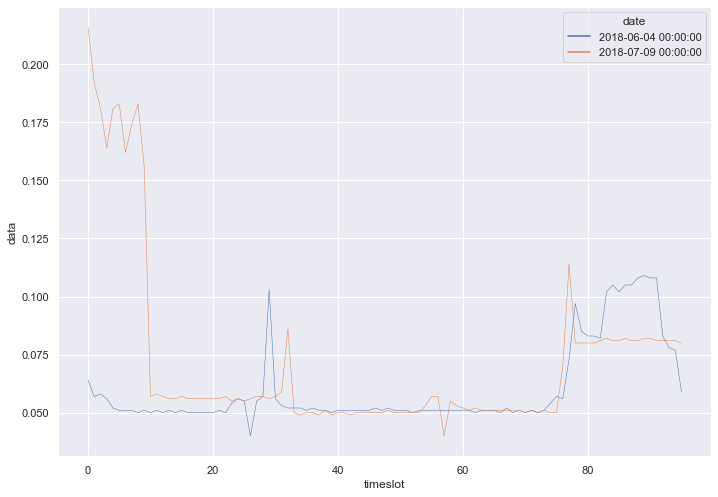

In [32]:
sns.lineplot(data=processingData[processingData['cluster'] == 'cluster-0'],
            x="timeslot",
            y="data",
            units="date",
            hue="date",
            estimator=None,
            lw=0.5)

<AxesSubplot:xlabel='timeslot', ylabel='data'>

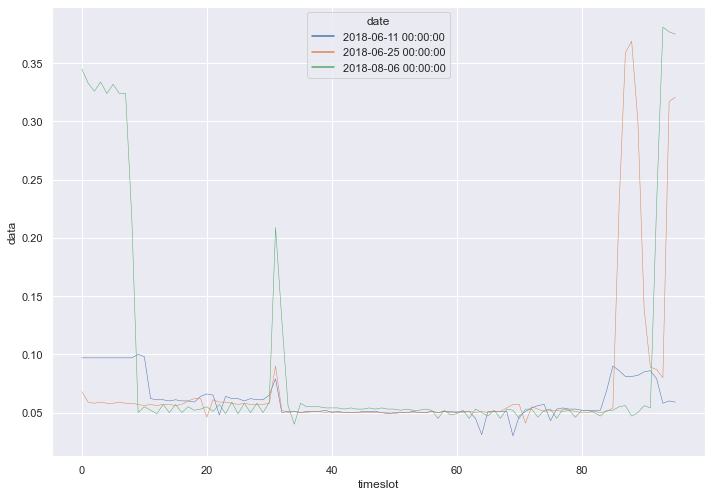

In [34]:
sns.lineplot(data=processingData[processingData['cluster'] == 'cluster-1'],
            x="timeslot",
            y="data",
            units="date",
            hue="date",
            estimator=None,
            lw=0.5)

<AxesSubplot:xlabel='timeslot', ylabel='data'>

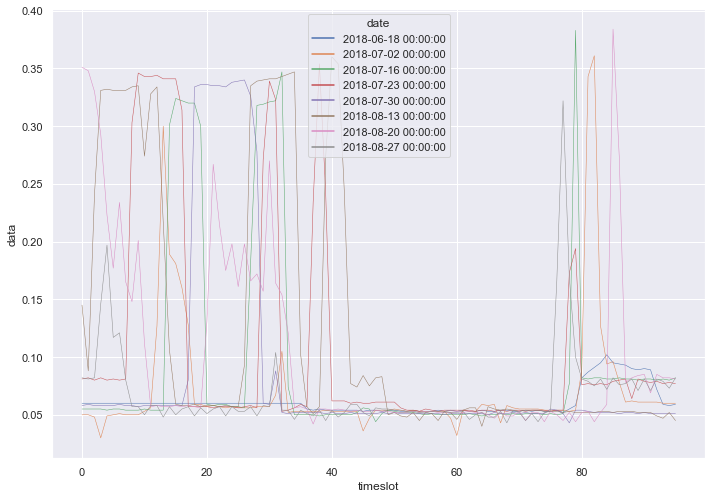

In [35]:
sns.lineplot(data=processingData[processingData['cluster'] == 'cluster--1'],
            x="timeslot",
            y="data",
            units="date",
            hue="date",
            estimator=None,
            lw=0.5)

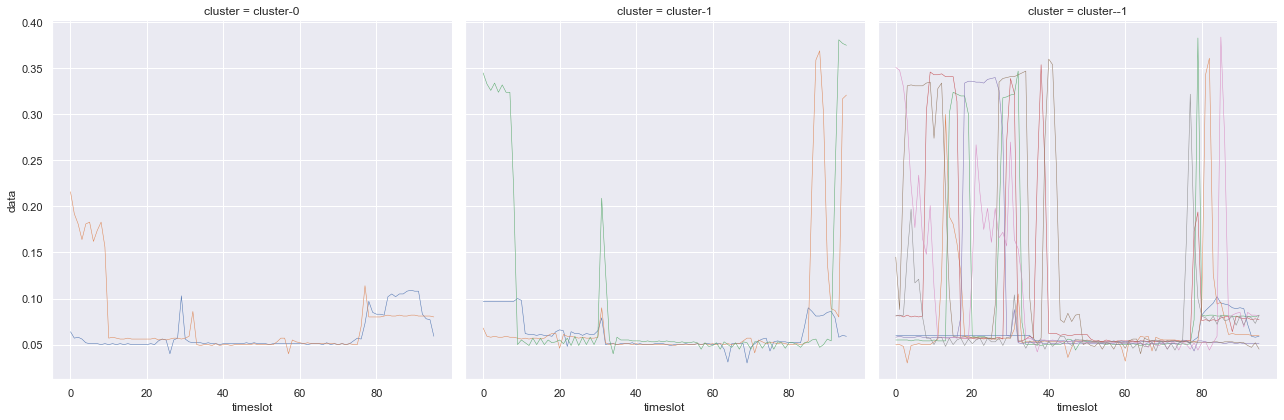

In [36]:
clusterMap = sns.FacetGrid(processingData, col="cluster",col_wrap=3, height=6)
clusterMap.map(sns.lineplot, "timeslot", "data", "date",estimator=None, lw=0.5)